In [1]:
"""
!pip install Augmentor
!pip install pillow
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install keras
!unzip ./python/images_background.zip
!unzip ./python/images_background_small1.zip
!unzip ./python/images_background_small2.zip
!unzip ./python/images_evaluation.zip
"""

'\n!pip install Augmentor\n!pip install pillow\n!pip install pandas\n!pip install matplotlib\n!pip install numpy\n!pip install keras\n!unzip ./python/images_background.zip\n!unzip ./python/images_background_small1.zip\n!unzip ./python/images_background_small2.zip\n!unzip ./python/images_evaluation.zip\n'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from load_data import load_directory, train_gen, val_gen, quiz_models, LossTracker, image_from_index, quiz
from build_models import make_convnet, make_capsnet, train_convnet, train_capsnet, plot_history
from keras.models import load_model

/home/alliedtoasters/miniconda3/envs/dev1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
batch_size = 30
directory = './images_evaluation/Atemayar_Qelisayer/'
train, test, labels = load_directory(directory)
loss_tracker = LossTracker()
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=380) #Use the entire validation set here.

In [4]:
input_shape = (105, 105, 1)
n_class = len(labels)
routings = 3
reconstruction_loss = .392

In [5]:
#convnet = make_convnet(input_shape, n_class, width=8, dropout=0)
convnet = load_model('test_convnet.h5')
convnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 105, 105, 1)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 97, 97, 8)         656       
_________________________________________________________________
conv2 (Conv2D)               (None, 93, 93, 16)        3216      
_________________________________________________________________
dropout_1 (Dropout)          (None, 93, 93, 16)        0         
_________________________________________________________________
maxp1 (MaxPooling2D)         (None, 46, 46, 16)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 45, 45, 16)        1040      
_________________________________________________________________
conv4 (Conv2D)               (None, 44, 44, 32)        2080      
__________

In [6]:
#history = train_convnet(convnet, tg, vg, directory, verbose=True, loss_obj=loss_tracker, epochs=10)

In [7]:
#plot_history(history)

In [8]:
results1, results2, results3 = quiz_models(directory, test, labels)


quizzing best accuracy model...

Quiz results: 30 out of 380 correct.
Quiz accuracy score: 0.079. Error rate: 0.921
Classification results: 24 out of 380 correct.
Classification accuracy score: 0.063. Error rate: 0.937

quizzing best loss model...

Quiz results: 29 out of 380 correct.
Quiz accuracy score: 0.076. Error rate: 0.924
Classification results: 27 out of 380 correct.
Classification accuracy score: 0.071. Error rate: 0.929

quizzing best overfit model...

Quiz results: 19 out of 380 correct.
Quiz accuracy score: 0.05. Error rate: 0.95
Classification results: 17 out of 380 correct.
Classification accuracy score: 0.045. Error rate: 0.955


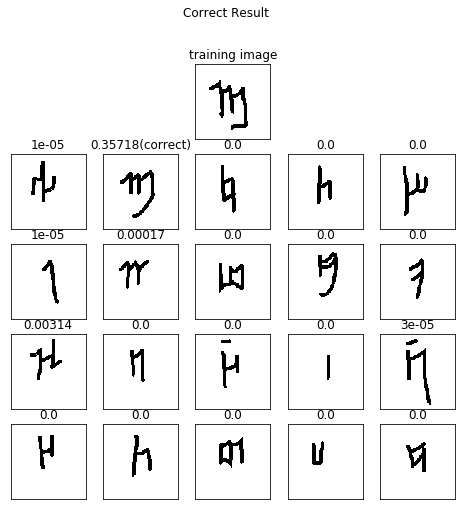

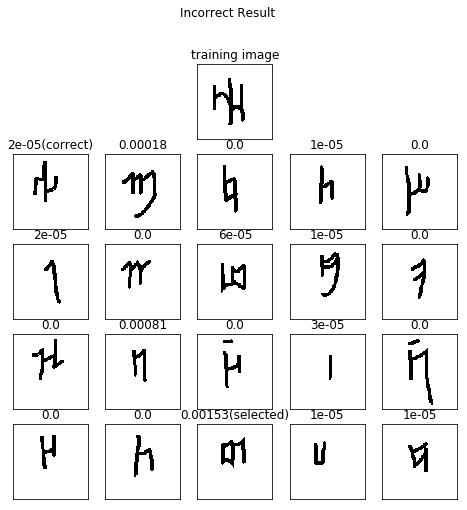

Quiz results: 194 out of 380 correct.
Quiz accuracy score: 0.511. Error rate: 0.489
Classification results: 161 out of 380 correct.
Classification accuracy score: 0.424. Error rate: 0.576


In [9]:
prediction = quiz(convnet, test, labels, visualize=True, train_df=train)

In [10]:
capsnet, eval_model, manipulate_model = make_capsnet(input_shape, n_class, routings, reconstruction_loss)

Instructions for updating:
dim is deprecated, use axis instead


In [12]:
capsnet.outputs

[<tf.Tensor 'capsnet/Sqrt:0' shape=(?, 26) dtype=float32>,
 <tf.Tensor 'decoder/out_recon/Reshape:0' shape=(?, 105, 105, 1) dtype=float32>]

In [ ]:
loss_tracker = LossTracker(scale_by=3)
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=batch_size)
history = train_capsnet(capsnet, tg, vg, directory, verbose=True, loss_obj=loss_tracker)

In [ ]:
results_caps1, results_caps2, results_caps3 = quiz_models(directory, test, labels, capsnet=True)

In [ ]:
manipulate_model.set_weights(capsnet.get_weights())
eval_model.set_weights(capsnet.get_weights())

In [ ]:
test.loc[[5, 10, 12]].label

In [ ]:
def plot_training_characters(train):
    """Plots the training characters for presentation"""
    

def plot_outputs(model, val_gen, test):
    """Looks at outputs of capsnet."""
    fig, ax = plt.subplots()
    for i in range(20):
        X, Y = next(val_gen)
        Y_pred, reconstructed = model.predict(X)
        img = X[0, :, :, 0]
        plt.title('input character (label {})'.format(np.argmax(Y[0, :])));
        plt.imshow(img, cmap='Greys_r');
        plt.show();
        plt.title('reconstructed character (predicted label {})'.format(np.argmax(Y_pred[0, :])));
        plt.imshow(reconstructed[0, :, :, 0], cmap='Greys_r');
        plt.show();
    return

plot_outputs(eval_model, vg, test)

In [ ]:
eval_model.outputs

In [ ]:
np.argmax(np.array([
    [0, 0, 0],
    [1, 1, 1]
]), axis=0)